# MINE 4101 Ciencia de datos aplicados - Proyecto 1

## 0. Importación de librerías y preparación del entorno de trabajo


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# path="Trasplante hepático consolidado limpio.xlsx"

path = os.path.join(
    "C:\\",
    "Users",
    "jmriv",
    "OneDrive - Universidad de los andes",
    "Semestres uniandes",
    "2025-2",
    "Ciencia de datos aplicada",
    "Proyecto transplantes hepáticos Fundación Sanatfé",
    "Trasplante hepático consolidado limpio.xlsx"
)

In [6]:
df = pd.read_excel(path,index_col=0)
df.sample(3)

,Año_Tx,Mes_Tx#1,Edad_Al_Tx,Tiempo_En_Lista_Días,Tiempo_En_Lista_Meses,Tiempo_En_Lista_Años,Sexo_Receptor,EPS,Causa_1_Tx_Hepático_,Causa_2_Tx_Hepático_,...,EKG_VALOR_POP_1,EKG_VALOR_POP_categoria,Retrasplante_bool,Indicación_Retrasplante_categoria,Fecha_Tx#2,Indicación_Retrasplante_categoria.1,Grado_HCC_desc,Sobrevida_Días_calculado,Causa_De_Muerte_categoria,Código de anonimización
#_Paciente,,,,,,,,,,,,,,,,,,,,,
158,2009,2,62.265753,159.0,5.300000,0.441667,2,6.0,4.0,0.0,...,3.0,Taquiarritmias supraventriculares,0.0,NaN,NaT,NaN,NaN,4724.0,NaN,TXHEP158
559,2019,3,64.597260,134.0,4.466667,0.372222,1,2.0,5.0,0.0,...,0.0,Normal,0.0,NaN,NaT,NaN,NaN,2113.0,NaN,TXHEP559
126,2008,4,43.153425,121.0,4.033333,0.336111,1,2.0,8.0,0.0,...,3.0,Taquiarritmias supraventriculares,0.0,NaN,NaT,NaN,NaN,6113.0,NaN,TXHEP126


## Funciones de graficado

In [7]:
def contingencia_vs_complicacion(col, label, x_labels, size=None):
    contingency_table = pd.crosstab(
        df['¿Complicación?'],
        df[col]
    )
    
    n=len(df[col].unique())
    percentages = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100
    annot = contingency_table.astype(str) + " (" + percentages.round(1).astype(str) + "%)"

    if size:
        plt.figure(figsize=size)
    sns.heatmap(percentages, annot=annot, fmt="", cmap="YlGnBu")

    plt.xticks([i+0.5 for i in range(n-1)], x_labels)
    plt.yticks([i+0.5 for i in range(2)], ['No', 'Sí'], rotation=0)

    plt.title(f"{label} vs. complicaciones")
    plt.xlabel(label)
    plt.ylabel('¿Complicaciones?')
    plt.show()

In [8]:
def box_plot_vs_complicacion(col, label):
    groups = [df[df['¿Complicación?']==num][col].dropna() for num in range(2)]

    plt.boxplot(
        groups,
        tick_labels=[f'No ({len(df[df["¿Complicación?"]==0][col].dropna())})',
                    f'Si ({len(df[df["¿Complicación?"]==1][col].dropna())})']
        )
    plt.xlabel("¿Complicaciones?")
    plt.ylabel(label)
    plt.show()

# Análisis univariado

## Complicaciones

Text(0.5, 1.0, 'Proporción de pacientes que presentan complicaciones')

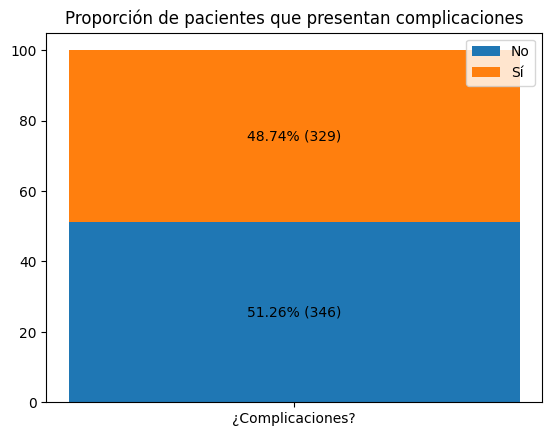

In [220]:
count = df['¿Complicación?'].value_counts(normalize=True)
bottom = 0
for label, value in count.items():
    new_label = "Sí" if label else "No"

    bar = plt.bar('¿Complicaciones?', value*100, bottom=bottom, label = new_label)
    plt.bar_label(
        bar,
        label_type= 'center',
        labels= [
            f'{value:.2%} ({df[df["¿Complicación?"]==label]["¿Complicación?"].value_counts()[label]})'
            ]
    )
    bottom += value*100
plt.legend()
plt.title('Proporción de pacientes que presentan complicaciones')

## Grupo etario

In [9]:
# Calcular variable de grupo etario
bins = [0, 17, 39, 59, 74, 120]
labels = ['<18', '18-39', '40-59', '60-74', '75+']

df['Grupo_Edad'] = pd.cut(
    df['Edad_Al_Tx'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

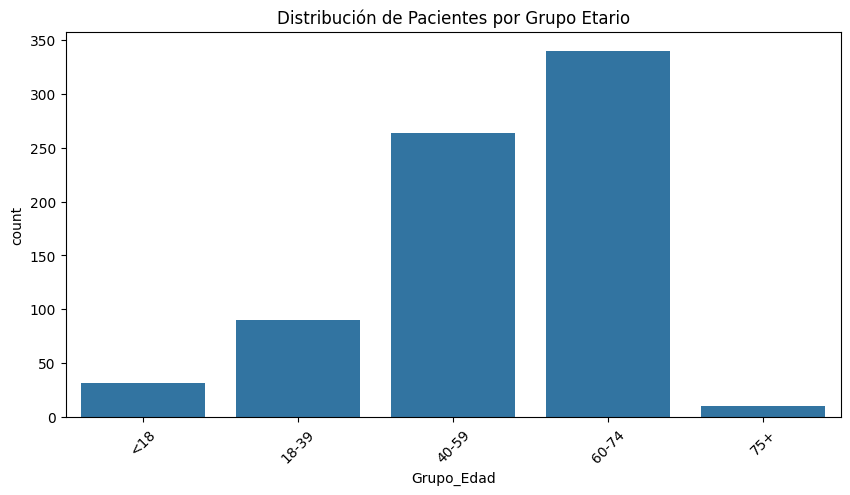

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Grupo_Edad' )
plt.xticks(rotation=45)
plt.title("Distribución de Pacientes por Grupo Etario")
plt.show()

## Sobrevida 30 días pos operatorio

Text(0.5, 1.0, 'Proporción de pacientes que sobreviven 30 días')

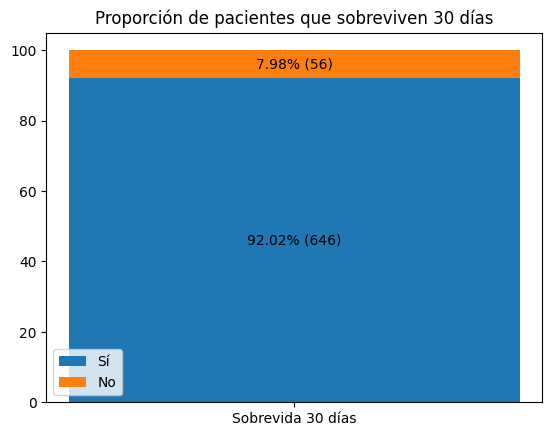

In [12]:
count = df['Sobrevida_PeriQx_30_días_POP'].value_counts(normalize=True)
bottom = 0
for label, value in count.items():
    new_label = "Sí" if label else "No"

    bar = plt.bar('Sobrevida 30 días', value*100, bottom=bottom, label = new_label)
    plt.bar_label(
        bar,
        label_type= 'center',
        labels= [
            f'{value:.2%} ({df[df["Sobrevida_PeriQx_30_días_POP"]==label]["Sobrevida_PeriQx_30_días_POP"].value_counts()[label]})'
            ]
    )
    bottom += value*100
plt.legend()
plt.title('Proporción de pacientes que sobreviven 30 días')

## Ecocardiograma posoperatorio PASP (pulmonary artery systolic pressure)

In [13]:
df[["Ecocardiograma_POP_PASP","¿Complicación?"]].loc[(df["Ecocardiograma_POP_PASP"]!= 0) & df["Ecocardiograma_POP_PASP"].notna()]

,Ecocardiograma_POP_PASP,¿Complicación?
#_Paciente,,
55,50.0,1.0
130,33.0,1.0
156,27.0,0.0
546,31.0,0.0
620,24.0,1.0
633,38.0,1.0
637,38.0,1.0
638,40.0,1.0
639,21.0,1.0


In [14]:
df["Ecocardiograma_POP_PASP"].loc[df["Ecocardiograma_POP_PASP"]!= 0].describe()

count    10.000000
mean     37.400000
std      14.833895
min      21.000000
25%      28.000000
50%      35.500000
75%      39.500000
max      72.000000
Name: Ecocardiograma_POP_PASP, dtype: float64

Se registran solo 10 pacientes con datos en ecocardiograma, de ello se puede evidenciar que la media es de 37 unidades, lo cual segun su definición es una presión normal. Sin embargo el dato también muestra pacientes con presiones por encima de los 39.5, lo cual puede entenderse como una muestra de hipertensión pulmonar

## Inmunosupresión con anticuerpos

El tratamiento inmunosupresior puede usarse tanto antes de la cirugia como después. Puede usarse como tratamiento de respuesta al rechazo o como terapia preventiva al mismo.

In [16]:
df["Inmunosupresión_con_Anticuerpos"].value_counts()

Inmunosupresión_con_Anticuerpos
NO    172
SI     56
Name: count, dtype: int64

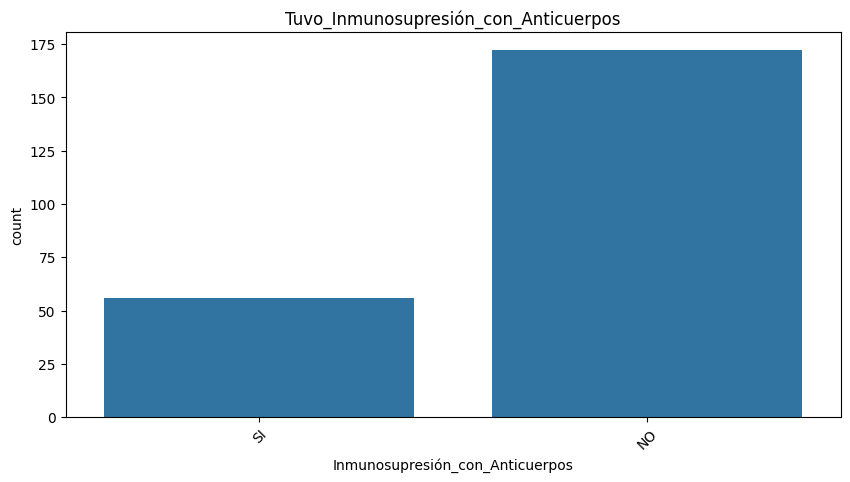

In [18]:
# tipo de reserva según lead_time
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Inmunosupresión_con_Anticuerpos')
plt.xticks(rotation=45)
plt.title("Tuvo_Inmunosupresión_con_Anticuerpos")
plt.show()

En la base de datos analizada, 56 pacientes recibieron inmunosupresión con anticuerpos, mientras que 172 no la recibieron

## α-Fetoproteína al momento del diagnóstico
La αFP es un macador tumoral

Se analizará esta variable de acuerdo a unos umbrales

In [20]:
bins = [-np.inf, 10, 100, 200, 400, 1000, np.inf]
labels = [
    'Normal (<10)',
    'Elevación leve (10–100)',
    'Indeterminado (100–200)',  # puedes renombrar o eliminar si prefieres
    'Alta sospecha (>200)',
    'Diagnóstico probable (>400)',
    'Alta carga tumoral (>1000)'
]

# Crear la variable categórica
df['αFP_categoria'] = pd.cut(
    df['αFP_Al_Dx'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=False  # el límite inferior es inclusivo
)

df['αFP_categoria'].value_counts()

αFP_categoria
Normal (<10)                   165
Elevación leve (10–100)         53
Alta sospecha (>200)            11
Diagnóstico probable (>400)     10
Indeterminado (100–200)          4
Alta carga tumoral (>1000)       2
Name: count, dtype: int64

In [23]:
df[['αFP_Al_Dx', 'αFP_categoria','¿Complicación?']].loc[
    df['αFP_categoria'].notna()
].sort_values('αFP_Al_Dx', ascending=False)

,αFP_Al_Dx,αFP_categoria,¿Complicación?
#_Paciente,,,
568,1924.00,Alta carga tumoral (>1000),0.0
138,1206.00,Alta carga tumoral (>1000),1.0
337,853.90,Diagnóstico probable (>400),1.0
564,721.00,Diagnóstico probable (>400),0.0
72,638.74,Diagnóstico probable (>400),0.0
...,...,...,...
383,1.35,Normal (<10),0.0
291,1.32,Normal (<10),0.0
368,1.24,Normal (<10),0.0


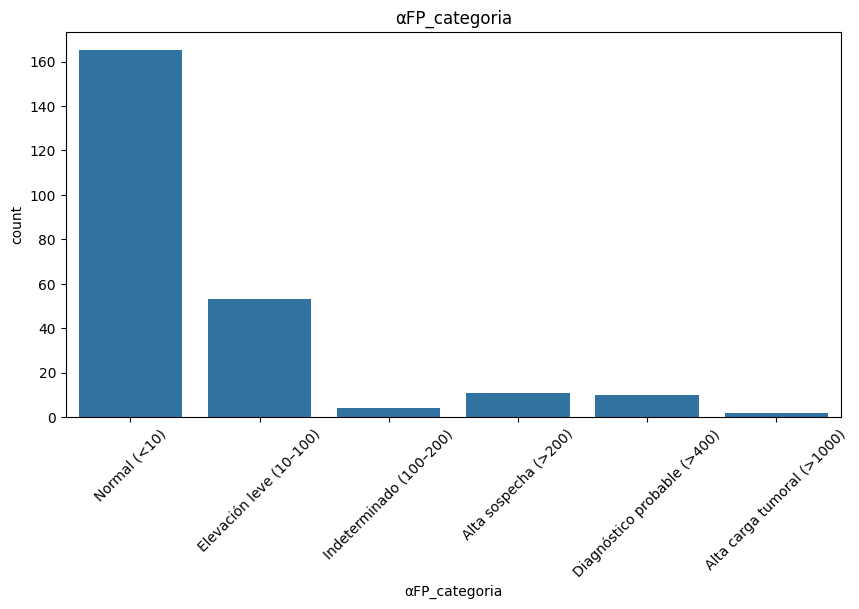

In [26]:
# tipo de reserva según lead_time
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='αFP_categoria')
plt.xticks(rotation=45)
plt.title("αFP_categoria")
plt.show()

En su mayoria los pacientestienen presencia de Alfa-Fetoprotenia en rangos considerados normales. Sin embargo se logran identificar pacientes con altas suspechas, diagnosticos probables y también con alta carga tumoral

In [27]:
df["αFP_Al_Dx"].describe()

count     245.000000
mean       59.458449
std       188.843439
min         0.900000
25%         3.400000
50%         6.000000
75%        15.370000
max      1924.000000
Name: αFP_Al_Dx, dtype: float64

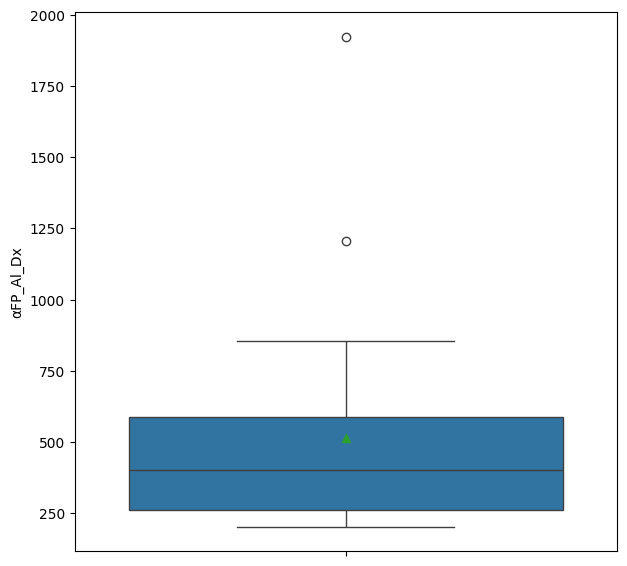

In [28]:
plt.figure(figsize=(7, 7))
sns.boxplot(
    data=df.loc[(df['αFP_Al_Dx']> 200)],
    y='αFP_Al_Dx',
    showmeans=True
)
plt.show()

El 75% de los pacientes tienen valores inferiores a 15.37 ng/mL, mientras que el valor máximo (1924 ng/mL) representa un caso extremo con diagnóstico confirmado de Hepatocarcinoma (HCC).

Al tomar los pacientes dentro de los grupos relevantes, que son aquellos con valores de la proteina superiores a 200, podemos evidenciar que la media está al rededor de las 500 unidades, lo cual ya es indicativo de presencia de cáncer. También se evidencian los pacientes atípicos con un diagnóstico de hepatocarcinoma comprobado con valores superiores a 1000 unidades. 

## Grado Hepato carcinoma (HCC)
Clasifica el hepatocarcinoma según el grado de diferenciación celular del tumor, siendo un indicador histológico de agresividad. 

   1: "Bien diferenciado" <br/>
    2: "Moderadamente diferenciado", <br/>
    3: "Poco diferenciado", <br/>
    4: "Indiferenciado" 

In [29]:
df["Grado_HCC"].value_counts()

Grado_HCC
2.0    49
3.0    40
4.0     6
1.0     4
Name: count, dtype: int64

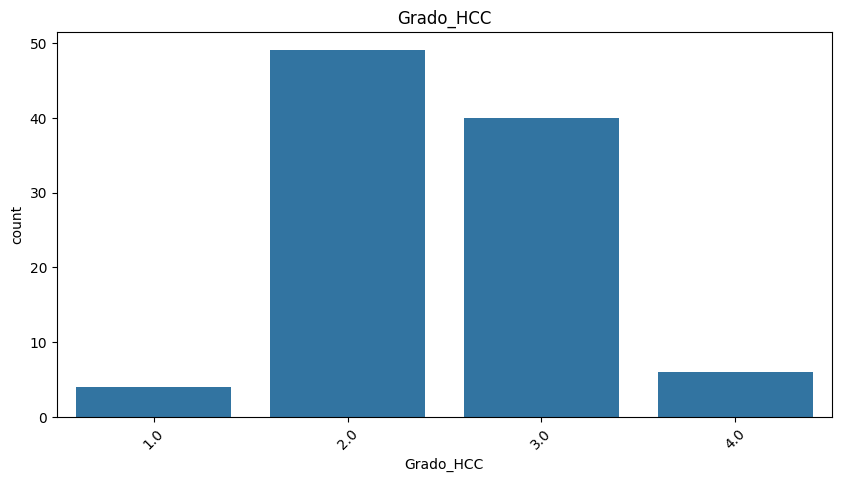

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Grado_HCC')
plt.xticks(rotation=45)
plt.title("Grado_HCC")
plt.show()

De los 99 pacientes con diagnóstico confirmado de hepatocarcinoma, la mayoría presenta un grado 2, lo cual indica una diferenciación celular moderada, es decir, las células cancerosas aún conservan ciertas características de las células hepáticas normales.

Sin embargo, un grupo importante de pacientes (grados 3 y 4) exhibe poca o nula diferenciación, lo que se asocia con tumores más agresivos y con peor pronóstico clínico.

## Estadio

In [32]:
df["Estadio"].value_counts()

Estadio
ESTADIO 1    53
ESTADIO 2    37
ESTADIO 3     8
ESTADIO 4     1
Name: count, dtype: int64

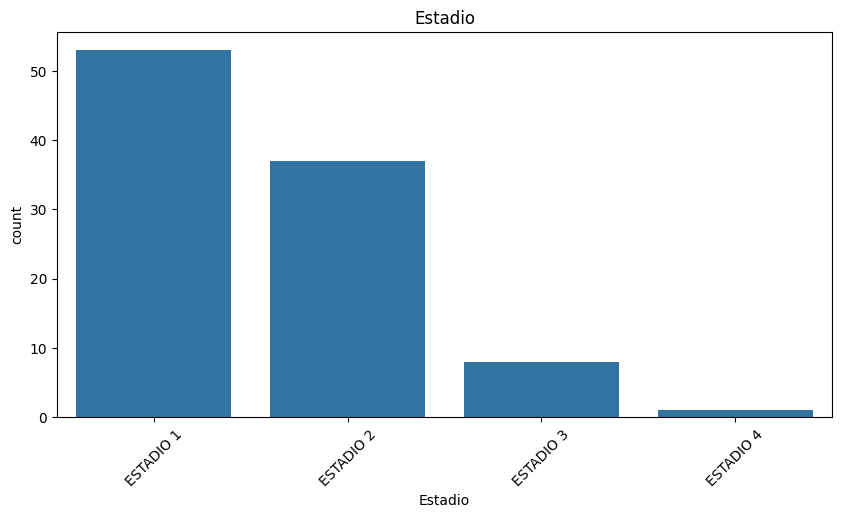

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Estadio', order=['ESTADIO 1','ESTADIO 2','ESTADIO 3','ESTADIO 4'])
plt.xticks(rotation=45)
plt.title("Estadio")
plt.show()

# Análisis bivariado

## Edad al momento del transplante

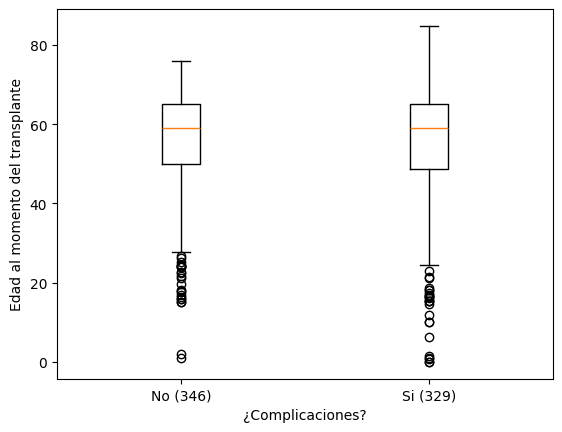

In [221]:
box_plot_vs_complicacion('Edad_Al_Tx','Edad al momento del transplante')

## BMI al momento del transplante

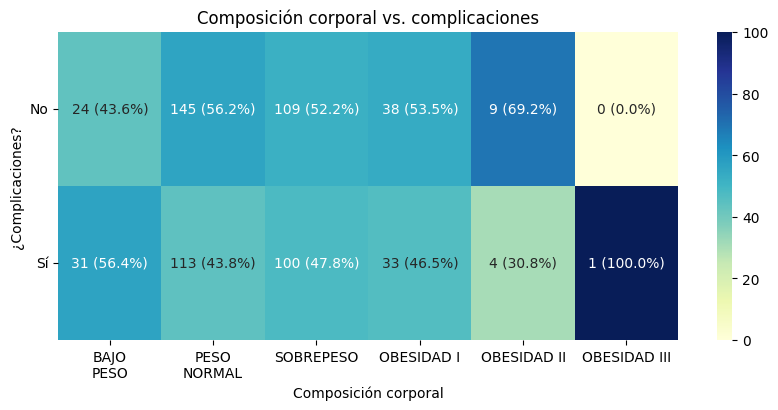

In [222]:
contingencia_vs_complicacion('Composición_Corporal', 'Composición corporal', ['BAJO\nPESO','PESO\nNORMAL','SOBREPESO','OBESIDAD I','OBESIDAD II','OBESIDAD III'], (10,4))

## Días que se dejó la sonda vesical

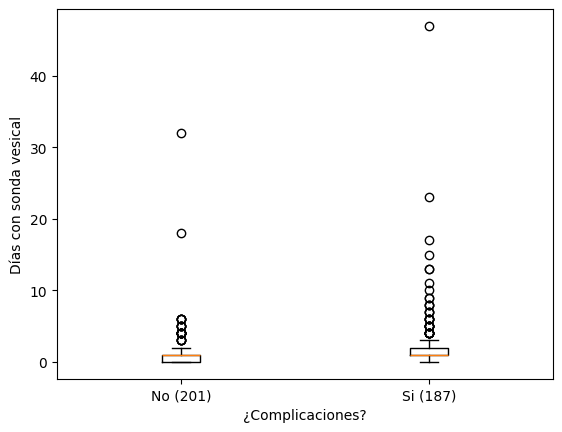

In [223]:
box_plot_vs_complicacion('Tiempo_Sonda_Vesical',"Días con sonda vesical")

## Días que se dejo el cateter central (CVC)

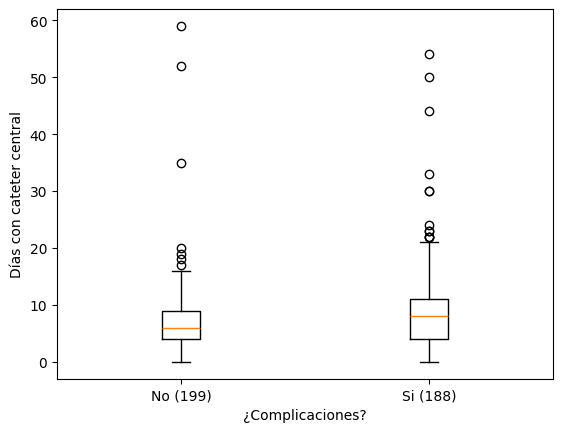

In [224]:
box_plot_vs_complicacion('Tiempo_CVC',"Días con cateter central")

## ¿El receptor tenía antocuerpos IGG contra Citomegalovirus?

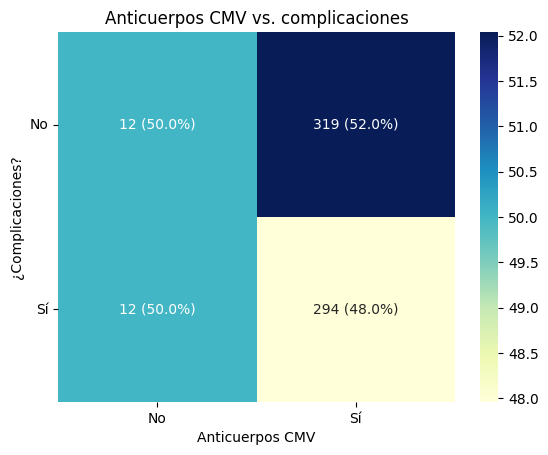

In [225]:
contingencia_vs_complicacion('CMV_Receptor', 'Anticuerpos CMV', ['No', 'Sí'])

## ¿El receptor tenía alguna valvulopatía pre quirúrgica?

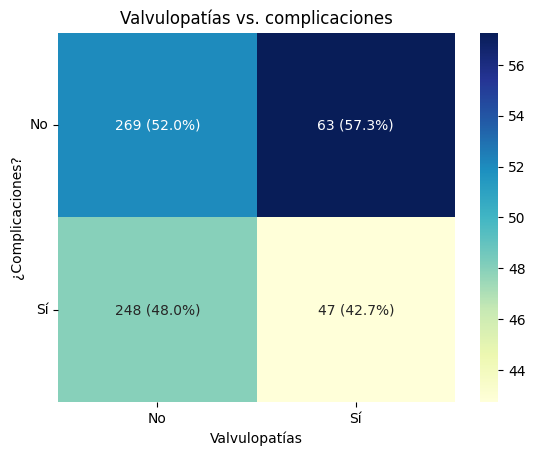

In [226]:
contingencia_vs_complicacion('Valvulopatía_SiNo', 'Valvulopatías', ['No', 'Sí'])

## Fracción de Eyección EKG

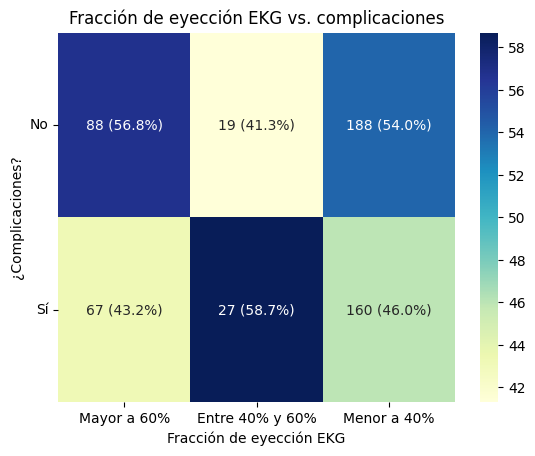

In [227]:
contingencia_vs_complicacion('Ecocardiograma_PreQx-FE_Cod', 'Fracción de eyección EKG', ['Mayor a 60%', 'Entre 40% y 60%', 'Menor a 40%'])

## Respuesta cronotrópica máxima por ecostress

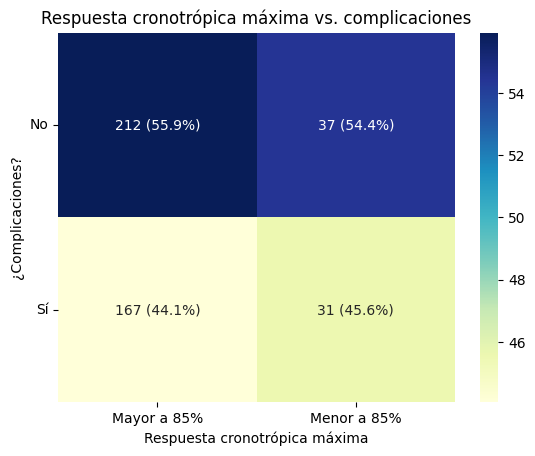

In [228]:
contingencia_vs_complicacion(
    'Ecocardiograma_PreQx_RC',
    'Respuesta cronotrópica máxima',
    ['Mayor a 85%', 'Menor a 85%'])

## Hipertensión pulmonar en EKG

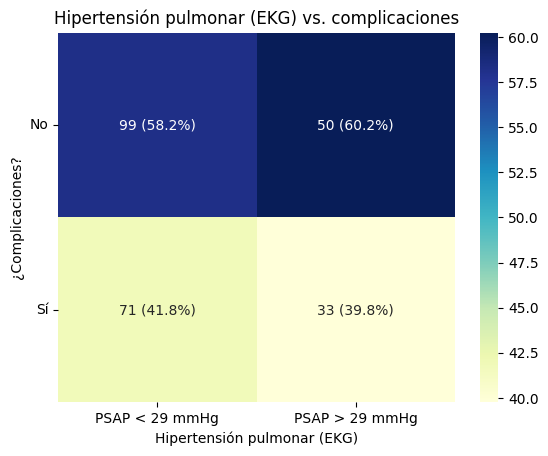

In [229]:
contingencia_vs_complicacion(
    'Ecocardiograma_PreQx_Hipertensión_Pulmonar',
    'Hipertensión pulmonar (EKG)',
    ['PSAP < 29 mmHg', 'PSAP > 29 mmHg'])

## TAPSE (Ecocardiograma)

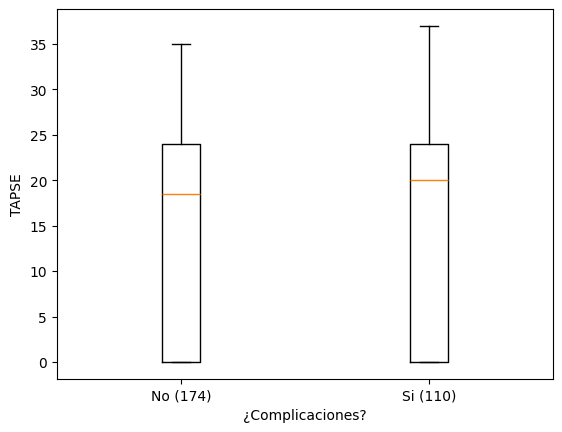

In [230]:
box_plot_vs_complicacion('Ecocardiograma_PreQx_TAPSE',"TAPSE")

## TAVSE (Ecocardiograma)

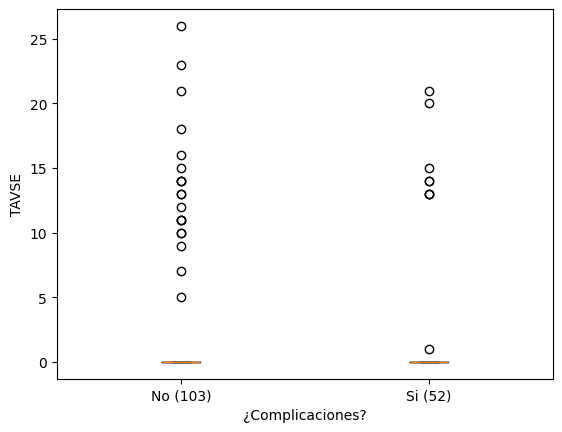

In [231]:
box_plot_vs_complicacion('Ecocardiograma_PreQx_TASVE',"TAVSE")

## Disfunción diastólica (EKG)

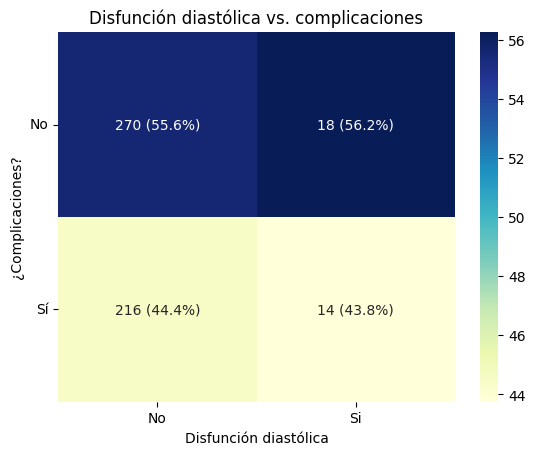

In [232]:
contingencia_vs_complicacion(
    'Ecocardiograma_PreQx_Disfunción_Diastólica',
    'Disfunción diastólica',
    ['No','Si'])

## METs (Unidades metabólicas de tarea)

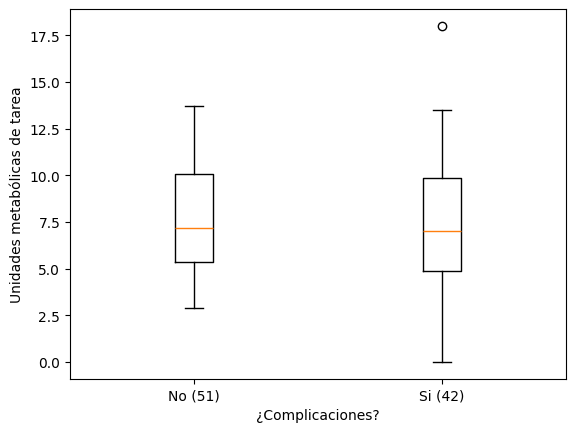

In [233]:
box_plot_vs_complicacion('METS',"Unidades metabólicas de tarea")

## Edad del donante

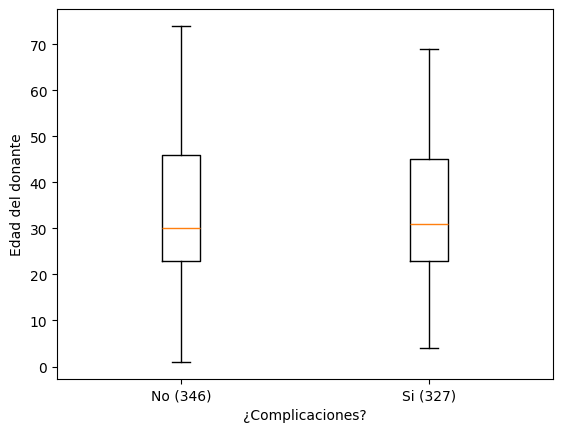

In [234]:
box_plot_vs_complicacion('Edad_Donante_Tx#1','Edad del donante')

## Transplante combinado hígado-riñón

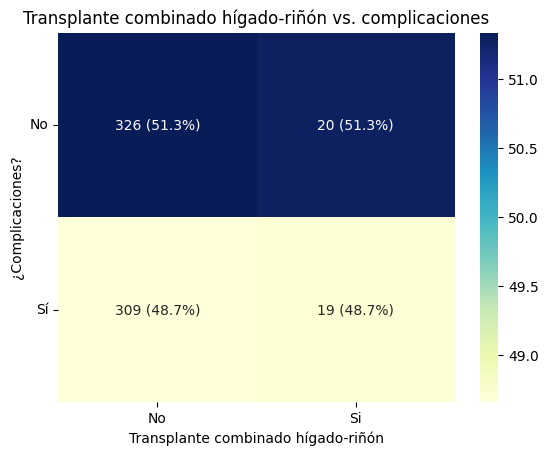

In [235]:
contingencia_vs_complicacion(
    'Trasplante_Combinado-Hígado-Riñón_Tx#1',
    'Transplante combinado hígado-riñón',
    ['No','Si'])

## # de unidades de glóbulos rojos usadas en Tx

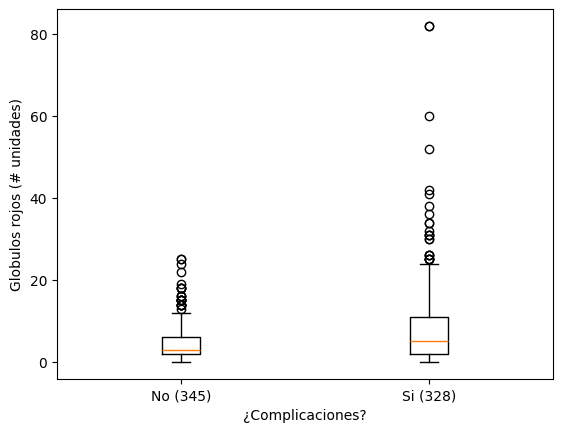

In [236]:
box_plot_vs_complicacion('#_Unidades_Glóbulos_Rojos_Tx#1','Globulos rojos (# unidades)')

## # de unidades de plasma fresco congelado usadas en Tx

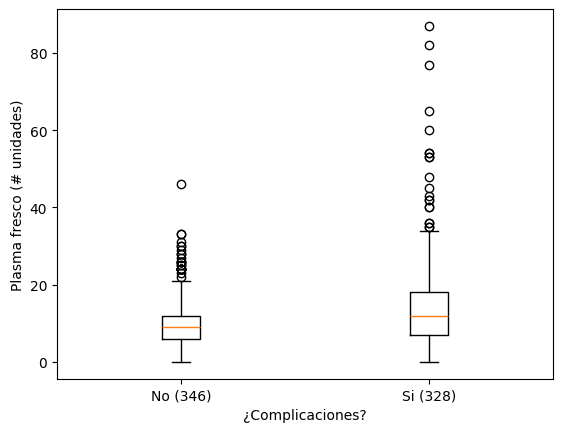

In [237]:
box_plot_vs_complicacion('#_Unidades_Plasma_Fresco_Congelado_Tx#1','Plasma fresco (# unidades)')

## # de unidades crioprecipitados usadas en Tx

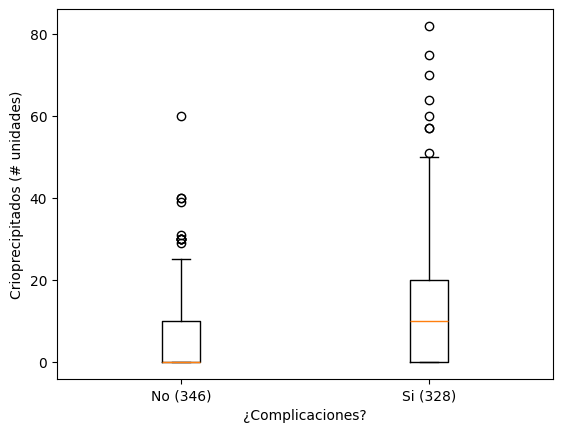

In [238]:
box_plot_vs_complicacion('#_Unidades_Crioprecipitados_Tx#1','Crioprecipitados (# unidades)')

## # de unidades de plaquetas usadas en Tx

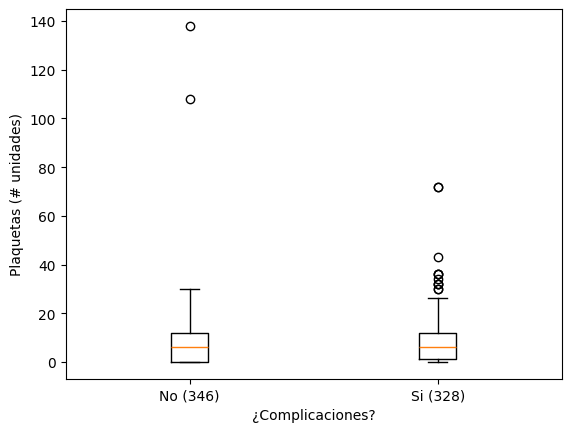

In [239]:
box_plot_vs_complicacion('#_Unidades_Plaquetas_Tx#1','Plaquetas (# unidades)')

## Tiempo quirúrgico (horas)

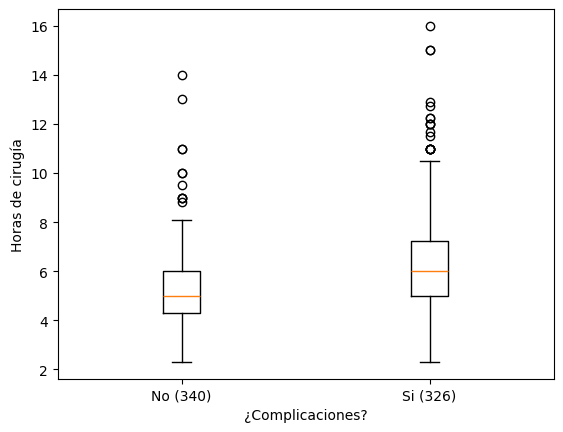

In [240]:
box_plot_vs_complicacion('Tiempo_Quirúrgico_Tx#1','Horas de cirugía')

## Antibiótico_Profiláctico_VS_Terapéutico

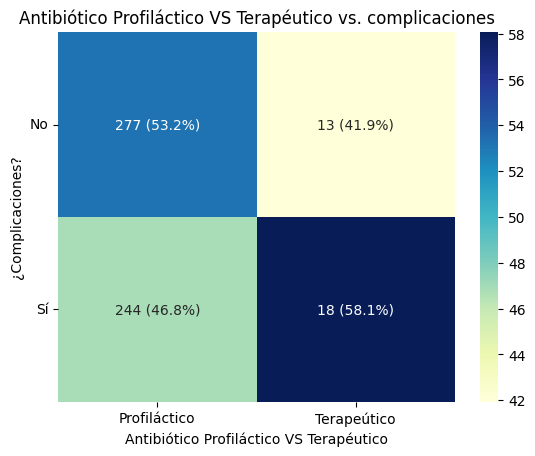

In [241]:
contingencia_vs_complicacion(
    'Antibiótico_Profiláctico_VS_Terapéutico',
    'Antibiótico Profiláctico VS Terapéutico',
    ['Profiláctico','Terapeútico'])

## Número de días que recibió antibiótico pretransplante en caso de infección

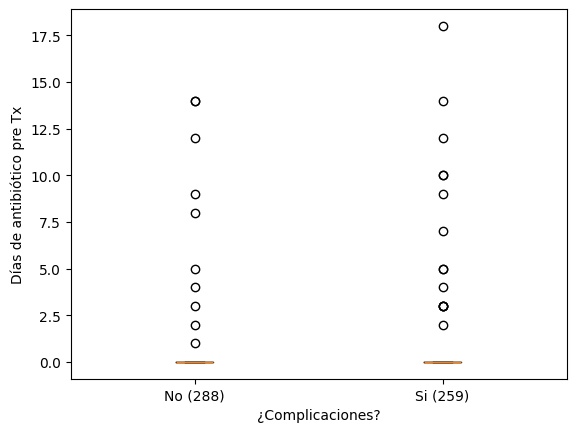

In [242]:
box_plot_vs_complicacion('Días_Tratamiento_Antibiótico_Previo_A_Tx#1','Días de antibiótico pre Tx')

## Tiempo entre profilaxis antibiótica y la incisión

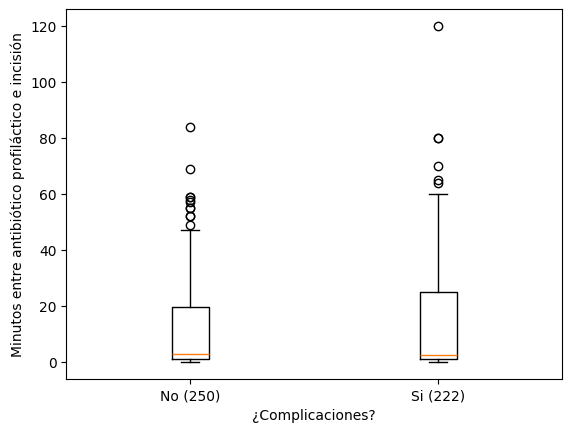

In [243]:
box_plot_vs_complicacion('Tiempo_De_Dosis_Hasta_Tx#1','Minutos entre antibiótico profiláctico e incisión')